In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [29]:
beads_range=[x for x in range(10,50,4) if x not in (38,46)] # # # #    monomer's range
dens_range=[x/100 for x in range(0,81,5) if x>0] # # # #    dens' range
frac_range=[x/100 for x in range(0,100,25) if x!=0] # # # #    frac' range
inters = ('blocos_fobicos', 'chain_cm', 'blocos_filicos')

In [30]:
def Data_2(bead, frac, dens):
    data = pd.read_table('./results/snapshots/coordination_analysis/f_'+str(frac)+'/b_'+str(bead)+'/d_'+str(dens)+'.txt', sep='\s+', header = 1)
    data.columns = ['Pair Separation Distance', '0-0', '0-1','1-1','NaN']
    data = data.drop(columns='NaN')
    return data
def Data_2(inter, bead, frac, dens):
    file = f'./centros_de_massas/{inter}/rdfs/f-{frac}_b-{bead}_d-{dens}.txt'
    data = pd.read_table(file, sep='\s+', header = 1)
    data.columns = ['Pair Separation Distance', 'g(r)','NaN']
    data = data.drop(columns='NaN')
    return data

In [36]:
def fftER(Inters, Beads, Fracs, Dens):
    
    for t in Inters:
        for f in Fracs:        
            f = int((1-f)*10%10)
            for d in Dens: 
                
                x = np.fft.fftfreq(Data_2(t, Beads[0], f, d)['Pair Separation Distance'].shape[0])
                m = x > 0

                y0=1+d*np.abs(np.fft.fft(Data_2(t, Beads[0], f, d)['Pair Separation Distance'])[m]-1); plt.plot(x[m], y0, label = Beads[0]);
                y1=1+d*np.abs(np.fft.fft(Data_2(t, Beads[1], f, d)['Pair Separation Distance'])[m]-1); plt.plot(x[m], y1, label = Beads[1]);
                y2=1+d*np.abs(np.fft.fft(Data_2(t, Beads[2], f, d)['Pair Separation Distance'])[m]-1); plt.plot(x[m], y2, label = Beads[2]);
                y3=1+d*np.abs(np.fft.fft(Data_2(t, Beads[3], f, d)['Pair Separation Distance'])[m]-1); plt.plot(x[m], y3, label = Beads[3]);
                y4=1+d*np.abs(np.fft.fft(Data_2(t, Beads[4], f, d)['Pair Separation Distance'])[m]-1); plt.plot(x[m], y4, label = Beads[4]);
                y5=1+d*np.abs(np.fft.fft(Data_2(t, Beads[5], f, d)['Pair Separation Distance'])[m]-1); plt.plot(x[m], y5, label = Beads[5]);
                y6=1+d*np.abs(np.fft.fft(Data_2(t, Beads[6], f, d)['Pair Separation Distance'])[m]-1); plt.plot(x[m], y6, label = Beads[6]);
                y7=1+d*np.abs(np.fft.fft(Data_2(t, Beads[7], f, d)['Pair Separation Distance'])[m]-1); plt.plot(x[m], y7, label = Beads[7]);
                
                plt.xlabel("q"); plt.ylabel('S(q) '+str(t));
                plt.title('static structure aproximation (Dens: '+str(d)+"; frac: "+str(f)+")")
                plt.legend(loc=0, ncol=2);
                plt.savefig('./results/snapshots/coordination_analysis/f_'+str(f)+'/d_'+str(d)+'/t_'+str(t)+'-(fft).png');
                plt.show()

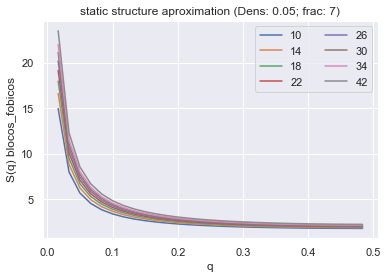

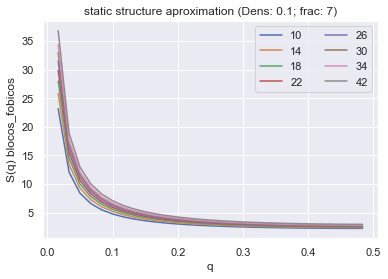

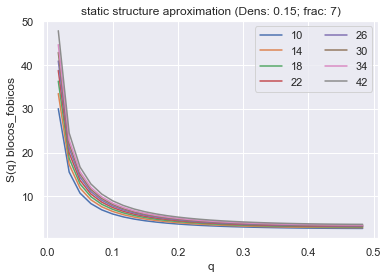

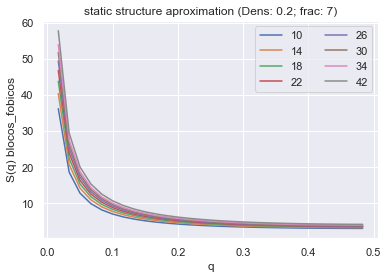

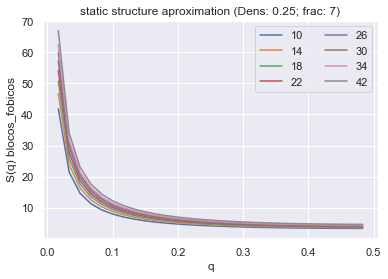

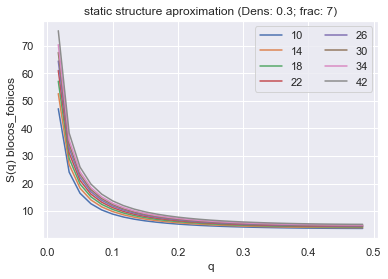

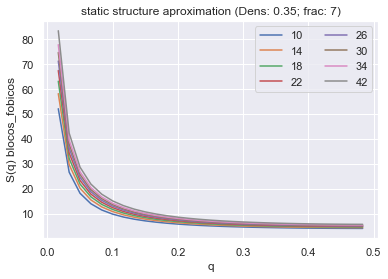

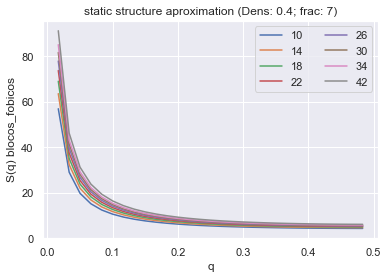

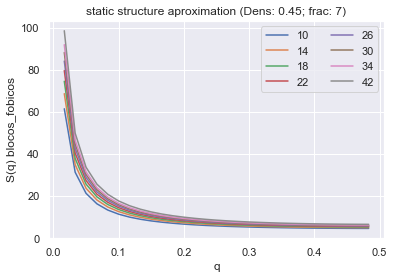

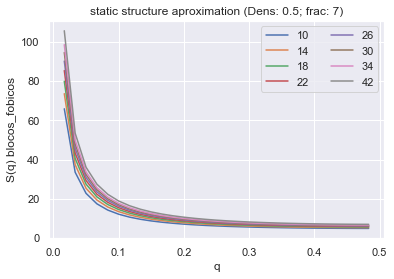

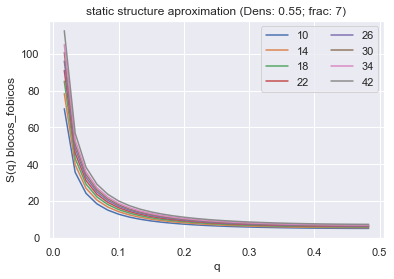

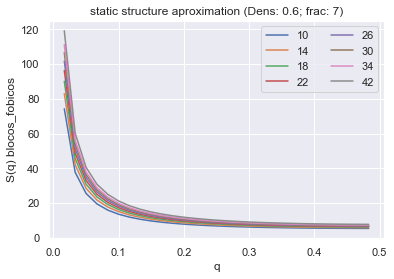

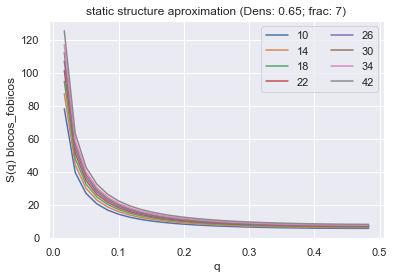

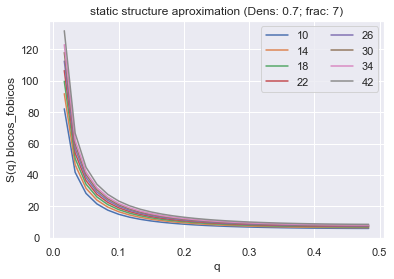

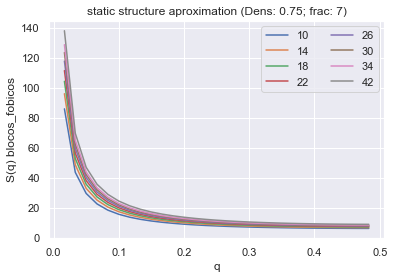

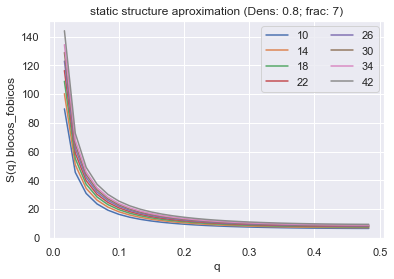

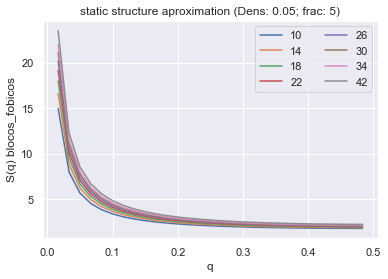

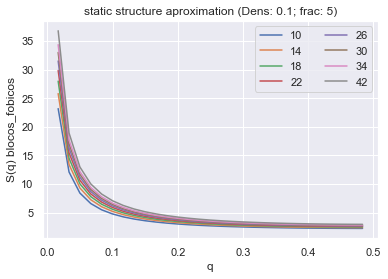

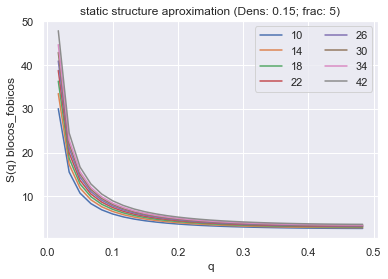

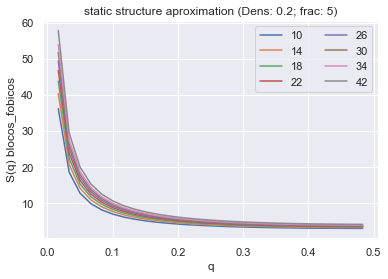

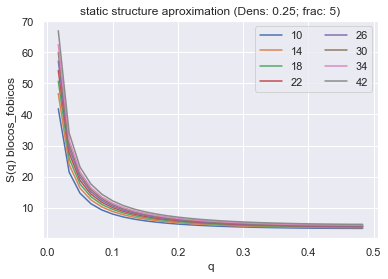

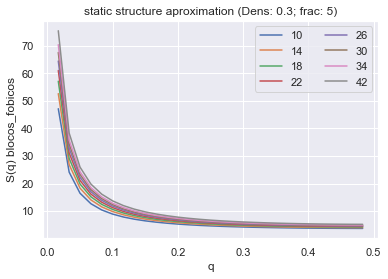

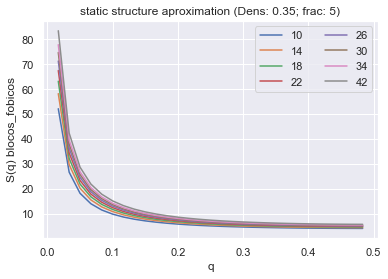

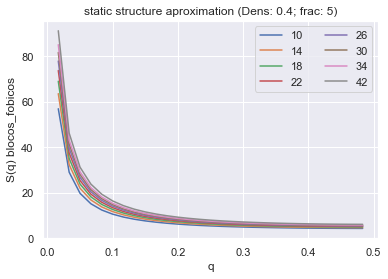

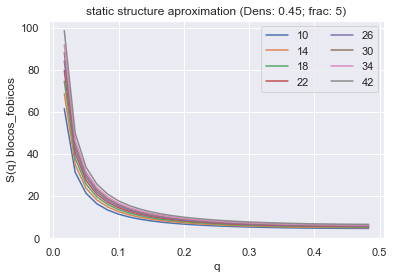

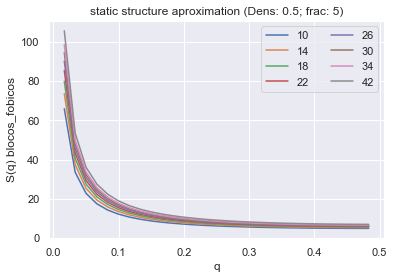

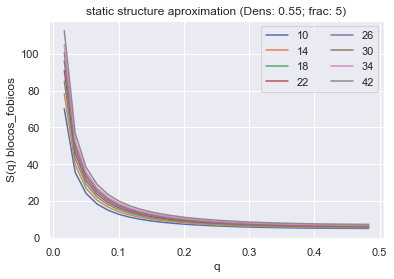

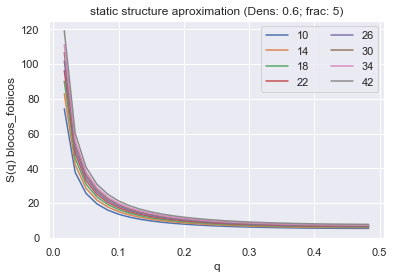

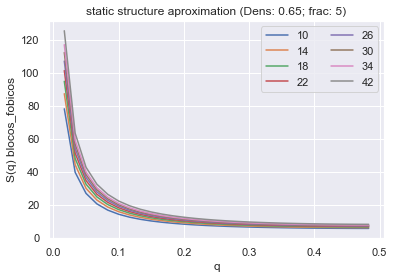

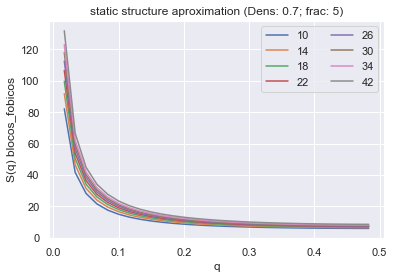

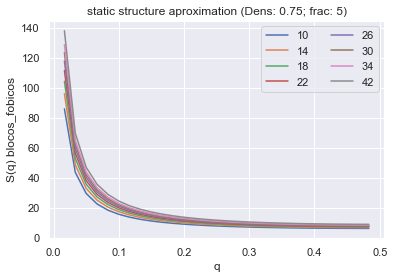

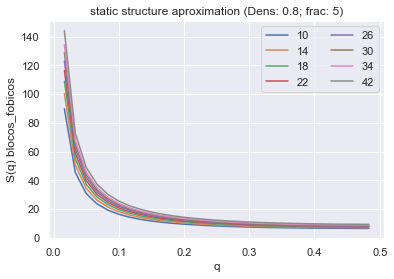

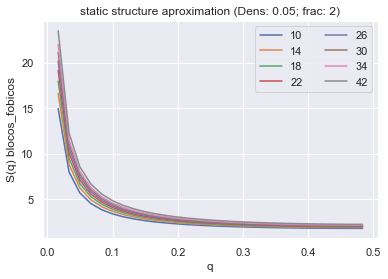

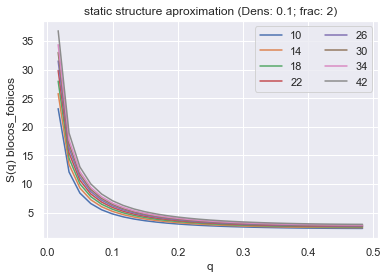

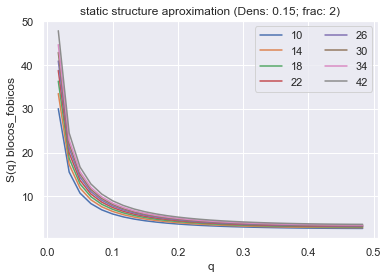

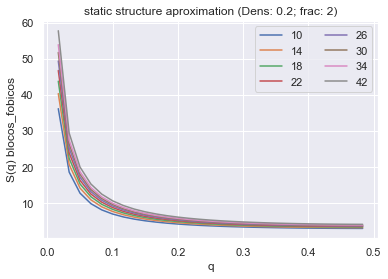

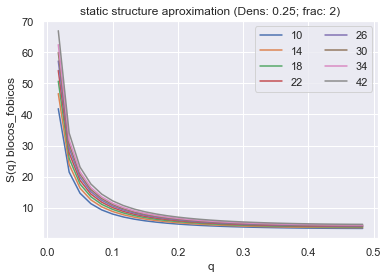

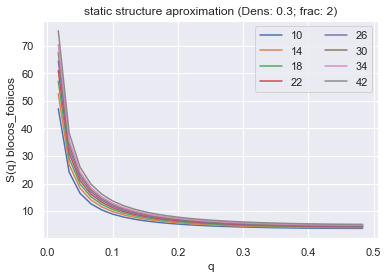

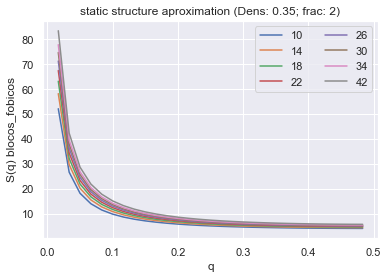

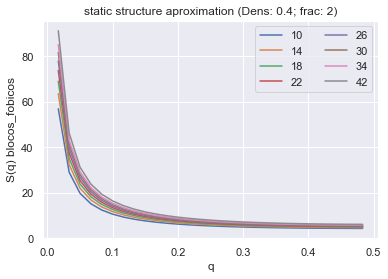

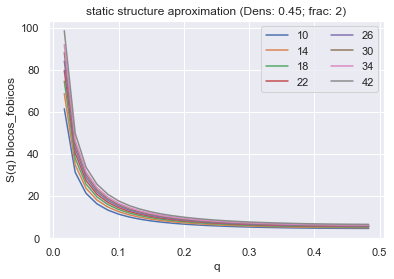

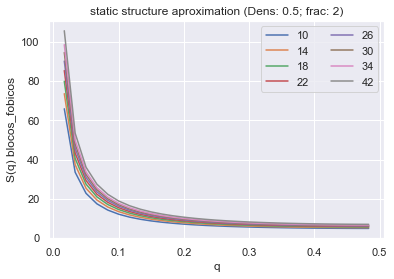

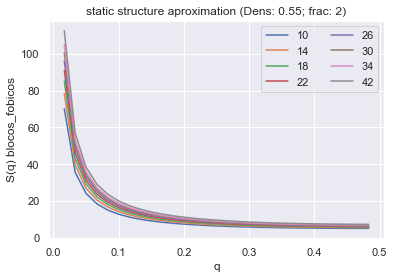

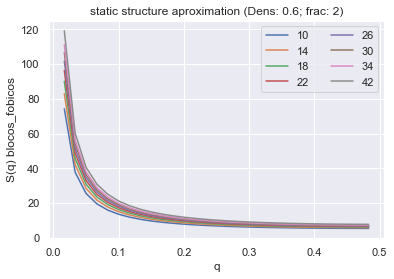

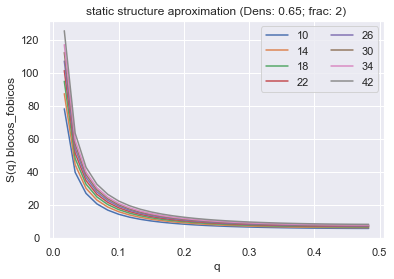

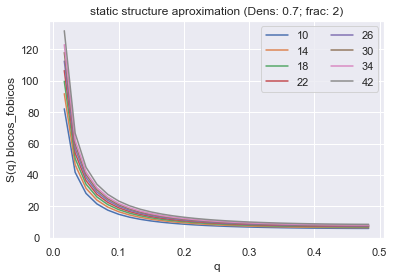

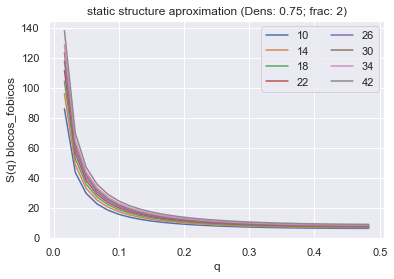

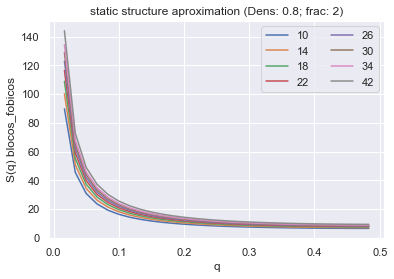

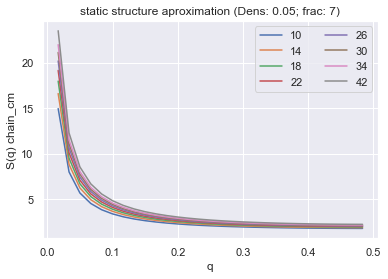

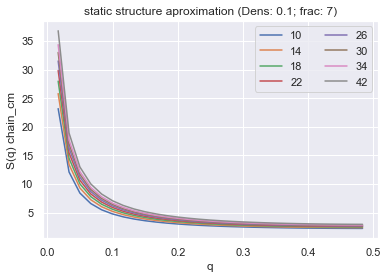

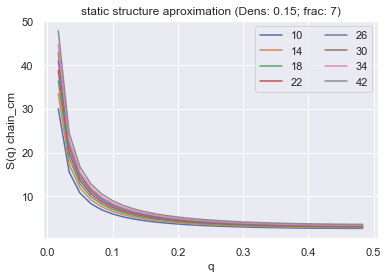

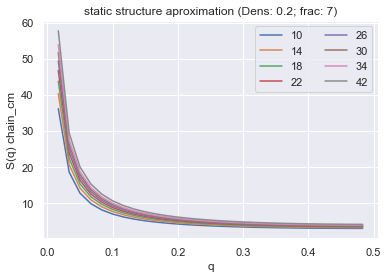

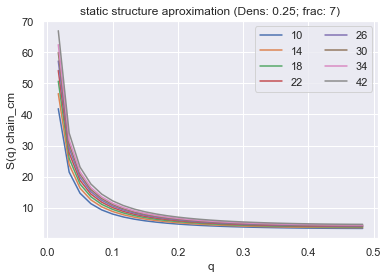

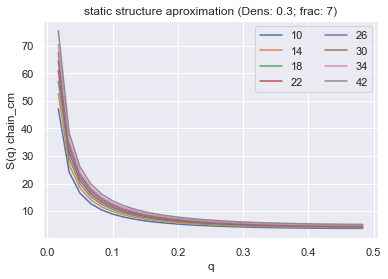

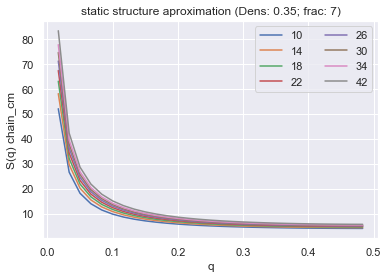

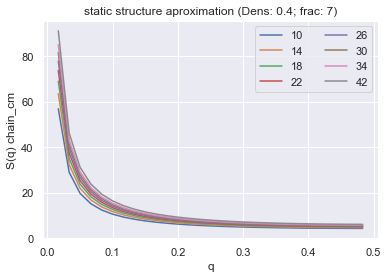

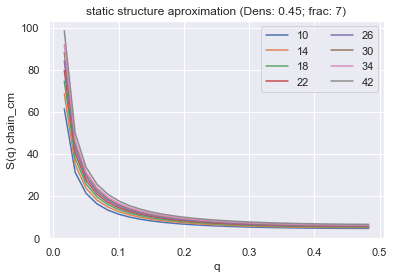

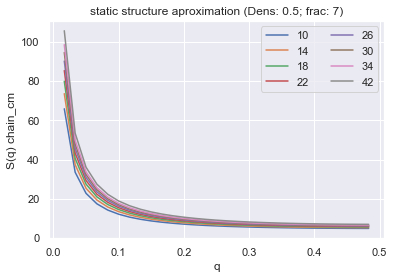

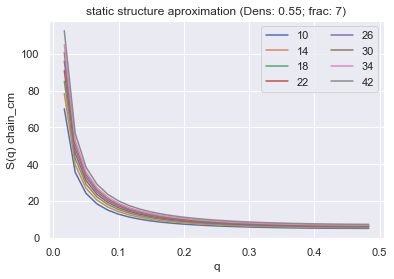

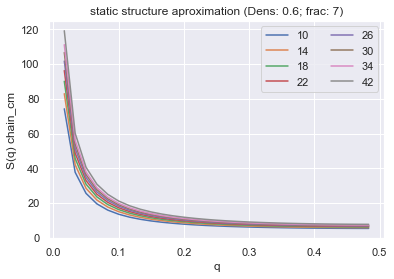

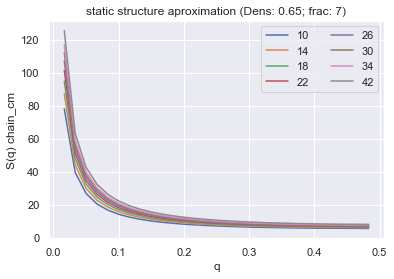

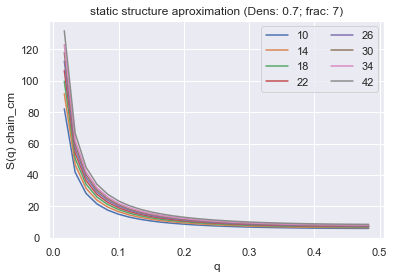

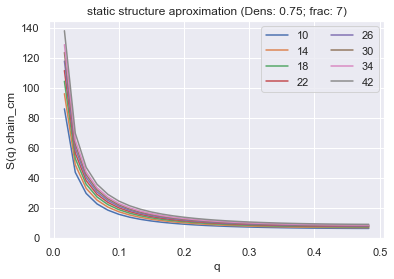

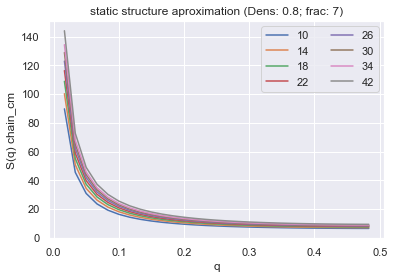

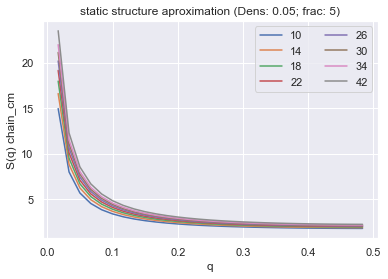

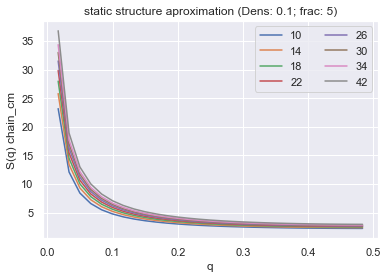

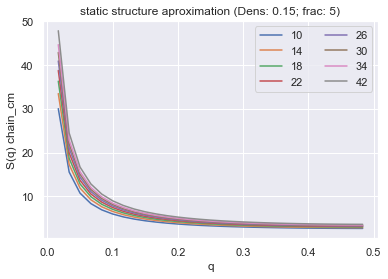

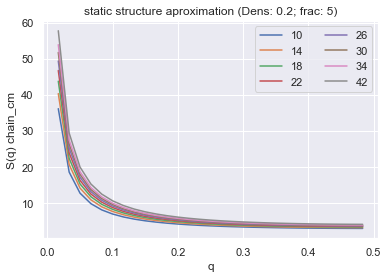

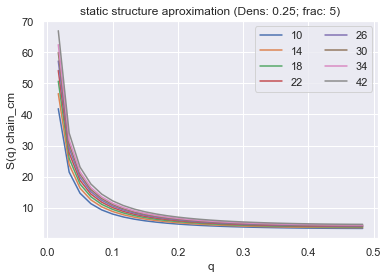

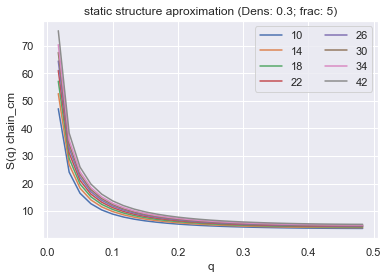

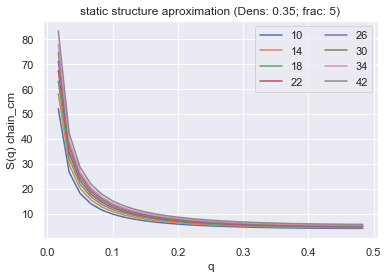

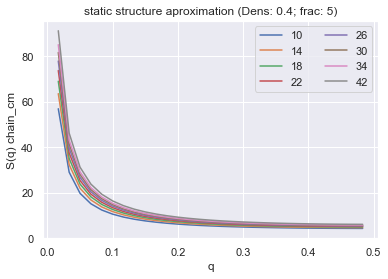

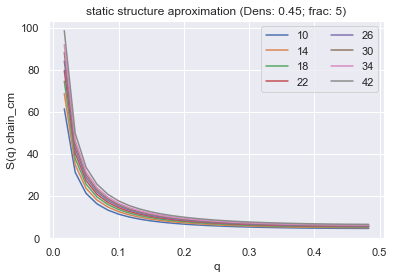

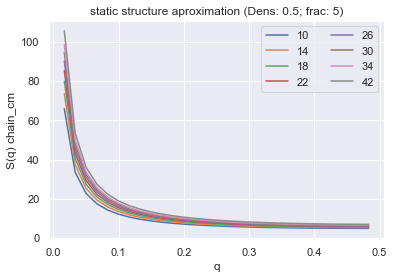

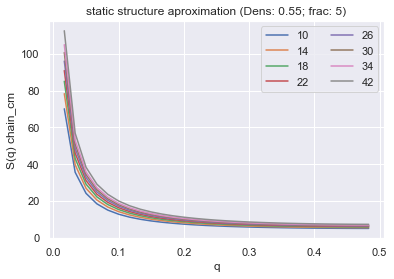

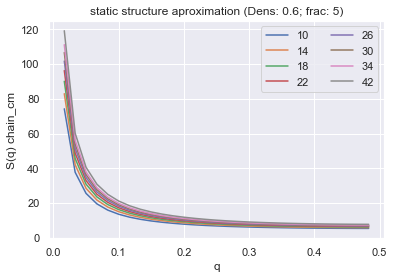

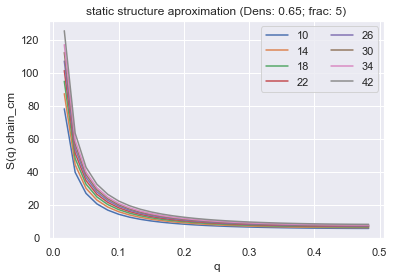

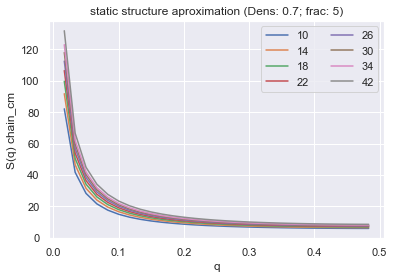

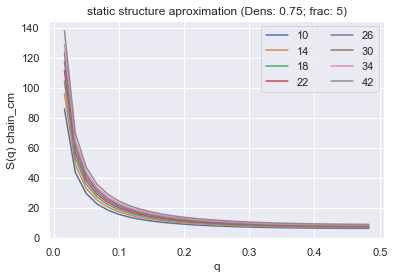

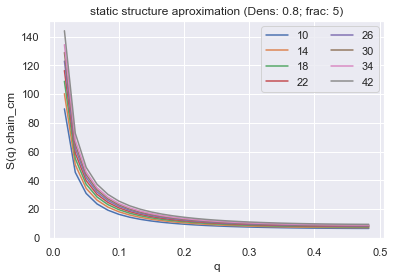

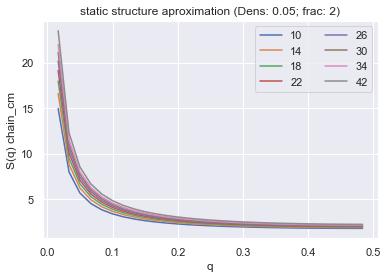

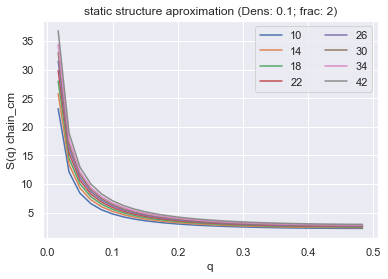

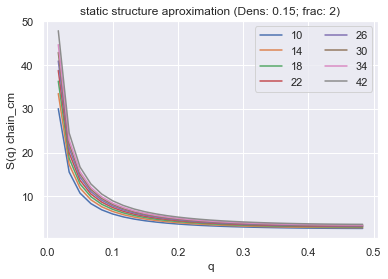

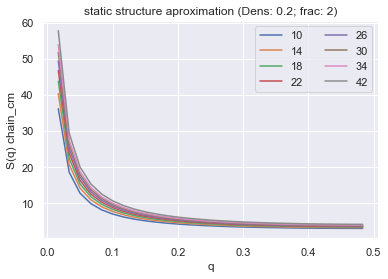

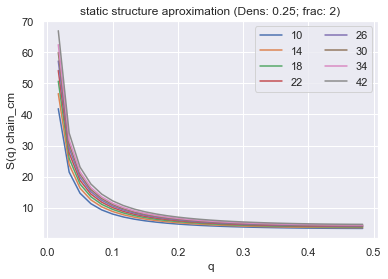

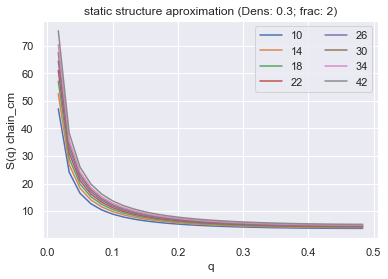

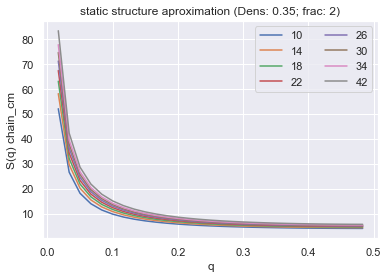

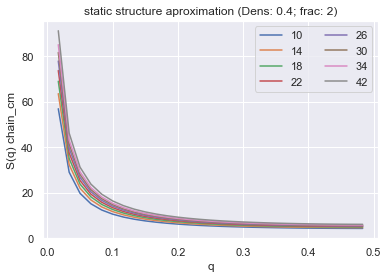

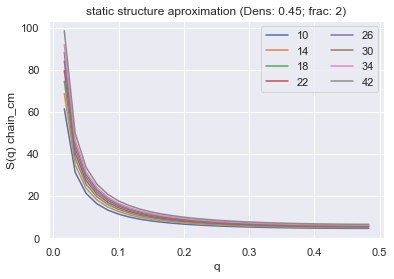

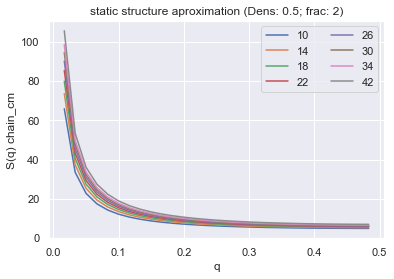

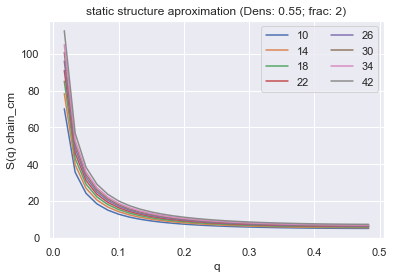

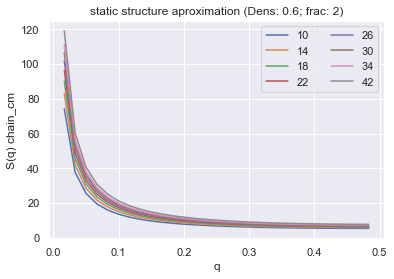

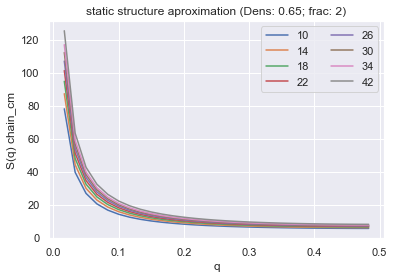

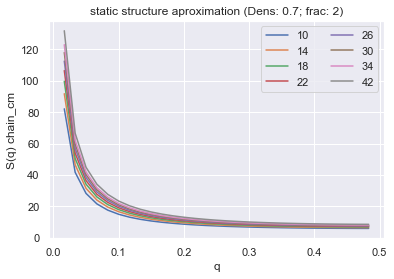

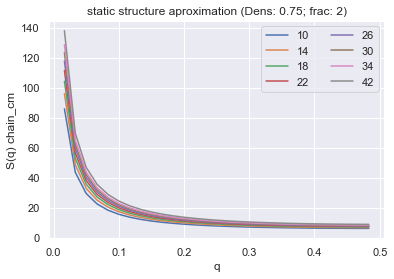

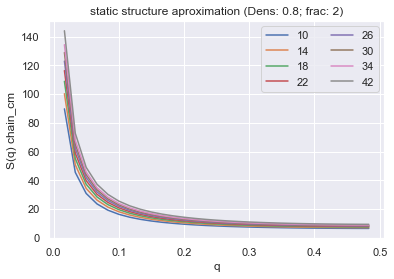

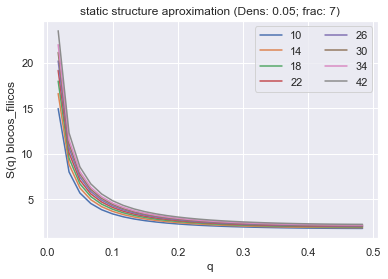

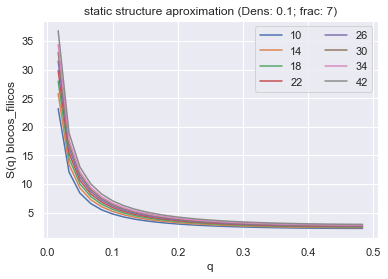

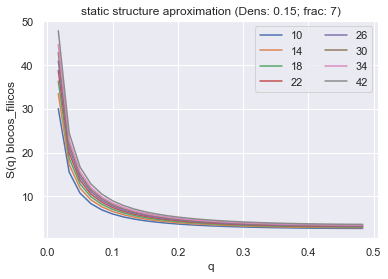

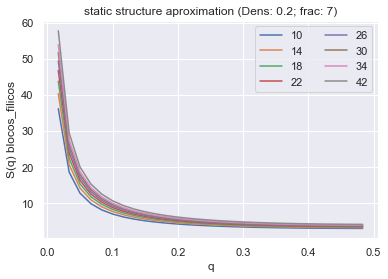

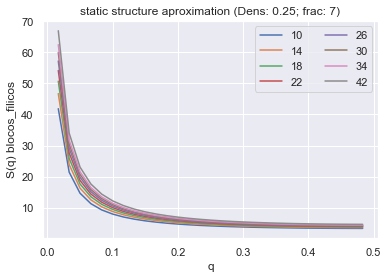

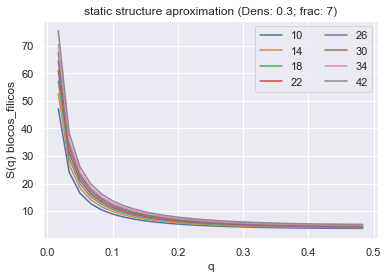

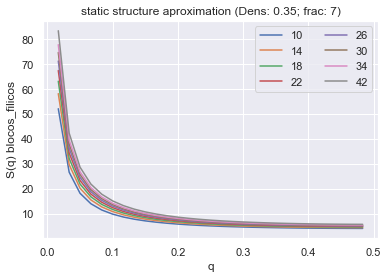

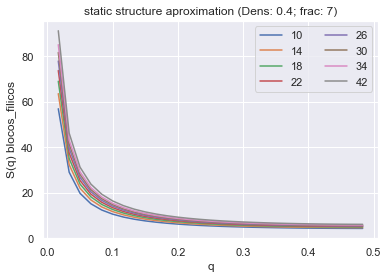

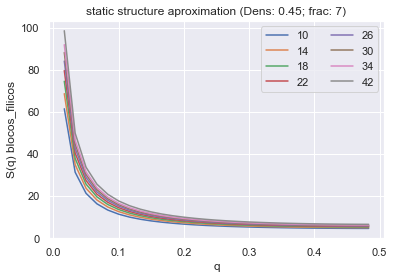

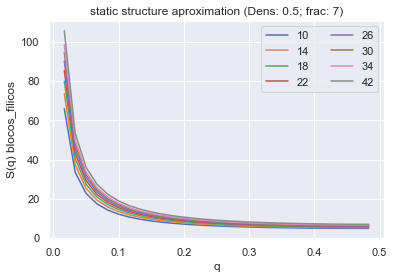

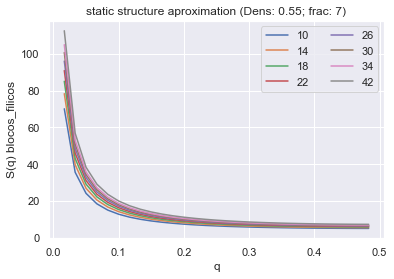

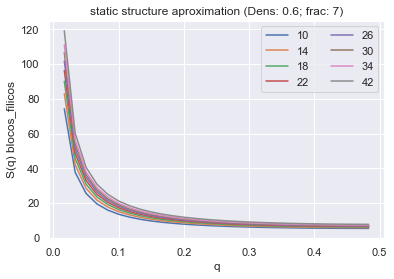

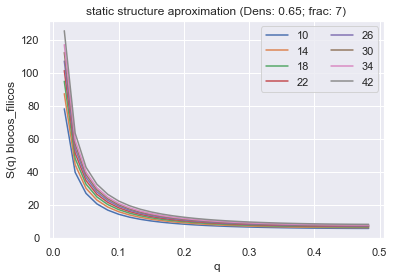

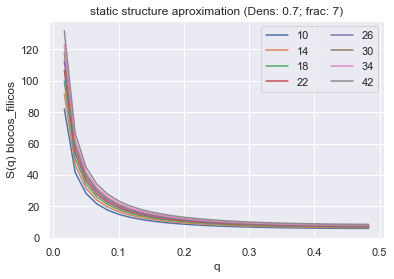

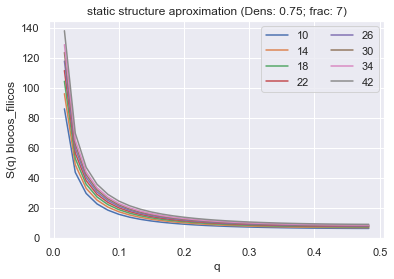

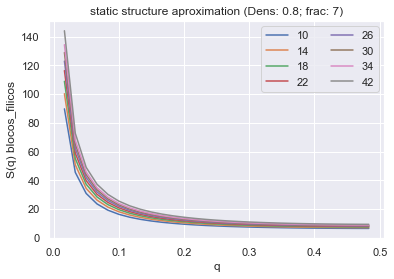

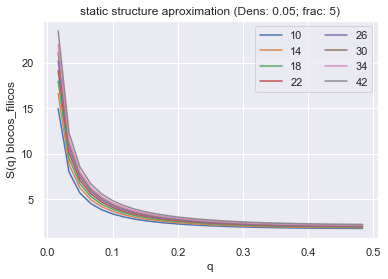

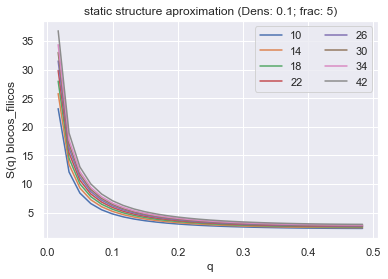

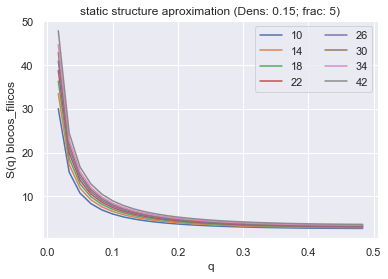

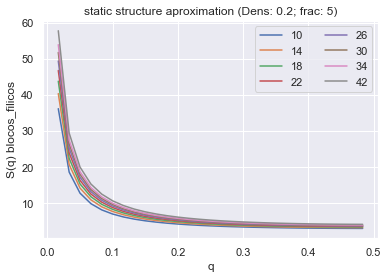

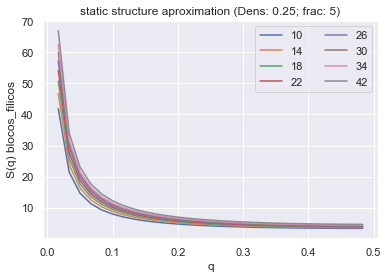

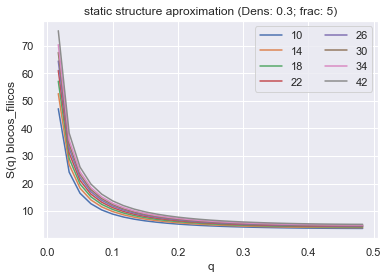

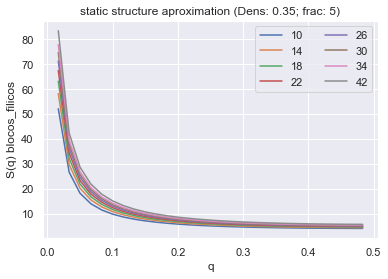

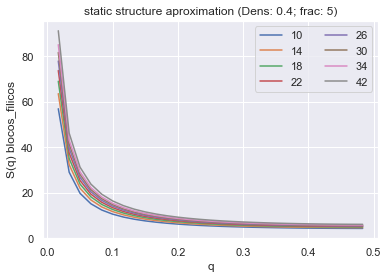

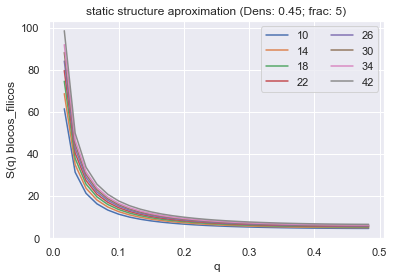

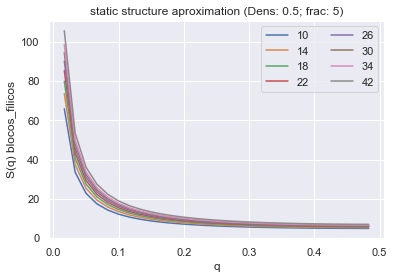

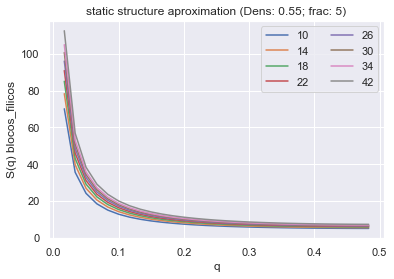

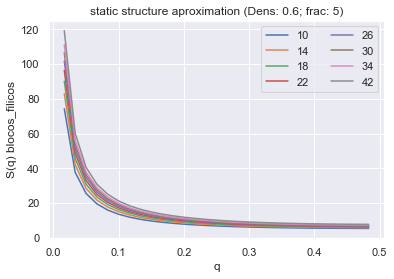

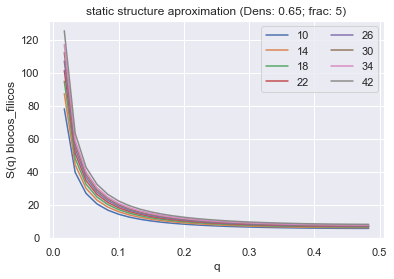

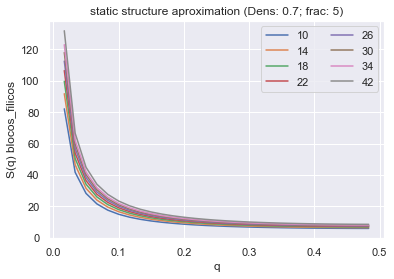

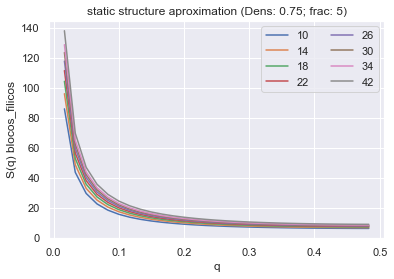

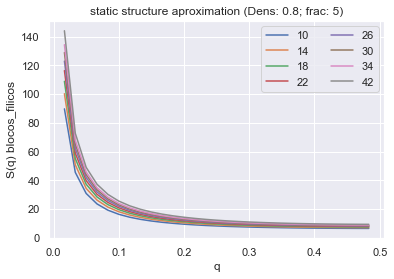

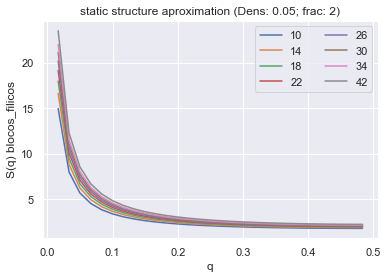

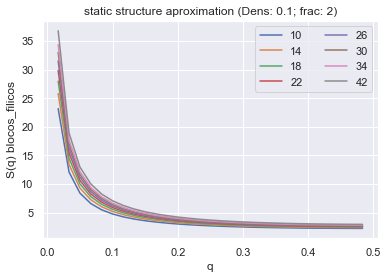

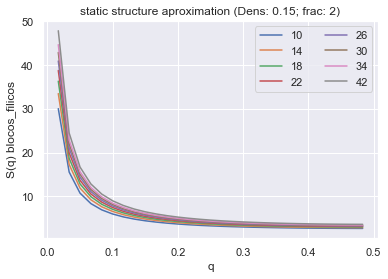

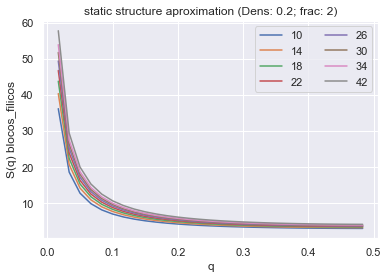

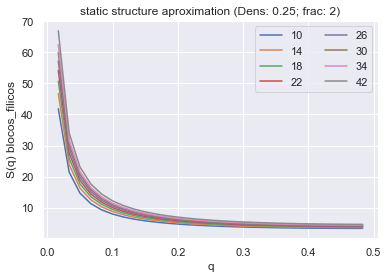

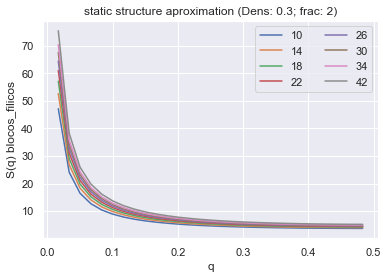

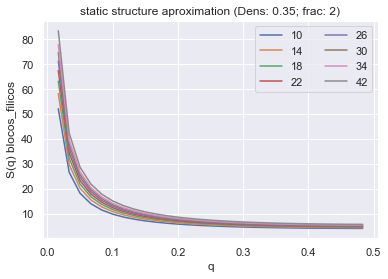

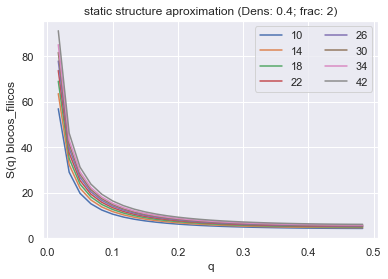

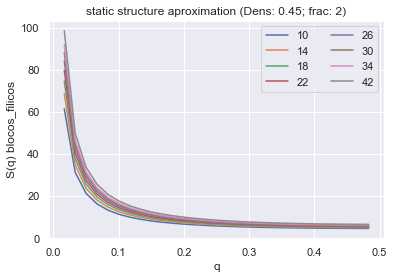

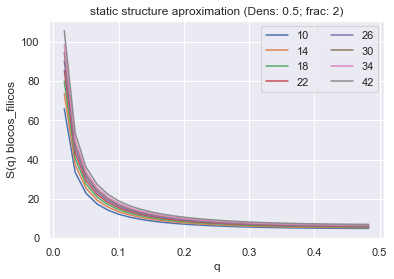

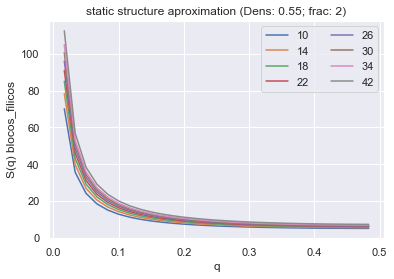

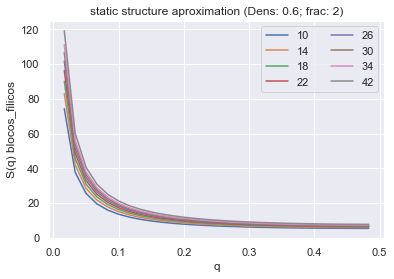

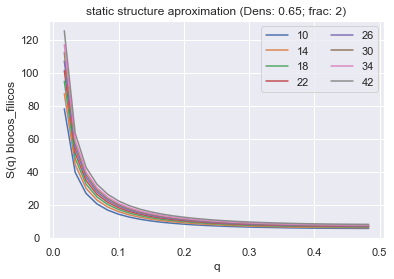

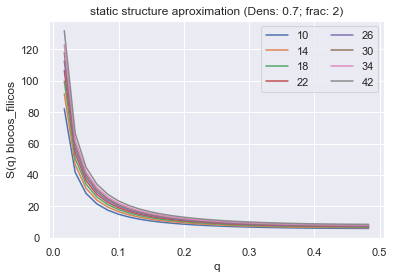

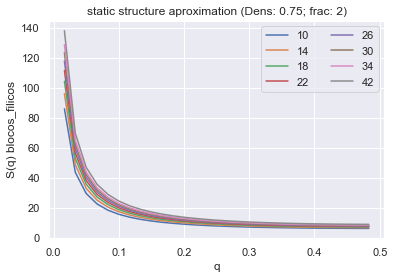

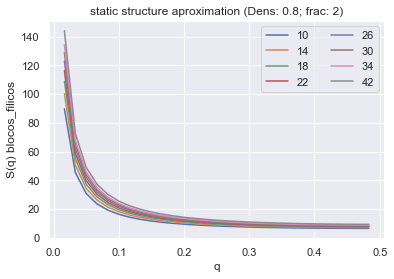

In [37]:
fftER(inters, beads_range, frac_range, dens_range)